In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

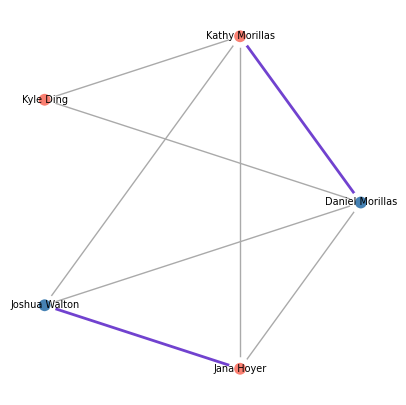

In [2]:
# Construct a graph with 5 vertices
n_vertices = 5
edges = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (3, 4)]
g = ig.Graph(n_vertices, edges)

# Set attributes for the graph, nodes, and edges
g["title"] = "Small Social Network"
g.vs["name"] = ["Daniel Morillas", "Kathy Archer", "Kyle Ding", "Joshua Walton", "Jana Hoyer"]
g.vs["gender"] = ["M", "F", "F", "M", "F"]
g.es["married"] = [False, False, False, False, False, False, False, True]
# Set individual attributes
g.vs[1]["name"] = "Kathy Morillas"
g.es[0]["married"] = True

# Plot in matplotlib
# Note that attributes can be set globally (e.g. vertex_size), or set individually using arrays (e.g. vertex_color)
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=0.1,
    vertex_color=["steelblue" if gender == "M" else "salmon" for gender in g.vs["gender"]],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=7.0,
    edge_width=[2 if married else 1 for married in g.es["married"]],
    edge_color=["#7142cf" if married else "#AAA" for married in g.es["married"]]
)

plt.show()

In [3]:
# Graphs
g1 = ig.Graph.Erdos_Renyi(900,0.002)
g2 = ig.Graph.Erdos_Renyi(900,0.006)
g3 = ig.Graph.Erdos_Renyi(900,0.012)
g4 = ig.Graph.Erdos_Renyi(900,0.045)
g5 = ig.Graph.Erdos_Renyi(900,0.1)

In [4]:
# Degree
degree_dist1 = g1.degree_distribution()
degree_dist2 = g2.degree_distribution()
degree_dist3 = g3.degree_distribution()
degree_dist4 = g4.degree_distribution()
degree_dist5 = g5.degree_distribution()
print("p = 0.002,",degree_dist1,'\n','\n',
     "p = 0.006,",degree_dist2,'\n','\n',
     "p = 0.012,",degree_dist3,'\n','\n',
     "p = 0.045,",degree_dist4,'\n','\n',
     "p = 0.1,",degree_dist5,'\n','\n',)

p = 0.002, N = 900, mean +- sd: 1.6978 +- 1.3036
Each * represents 4 items
[0, 1): ****************************************** (170)
[1, 2): ****************************************************************** (264)
[2, 3): **************************************************************** (258)
[3, 4): ****************************** (121)
[4, 5): ************* (55)
[5, 6): ******* (28)
[6, 7):  (3)
[7, 8):  (1) 
 
 p = 0.006, N = 900, mean +- sd: 5.4022 +- 2.3627
Each * represents 2 items
[ 0,  1): * (3)
[ 1,  2): ********** (20)
[ 2,  3): ******************************* (62)
[ 3,  4): ****************************************************** (108)
[ 4,  5): *************************************************************************** (151)
[ 5,  6): ****************************************************************************** (157)
[ 6,  7): ***************************************************************** (131)
[ 7,  8): ****************************************************** (108)
[ 8,  9): 

<AxesSubplot:title={'center':'probability density distribution (p = 0.1)'}, ylabel='Density'>

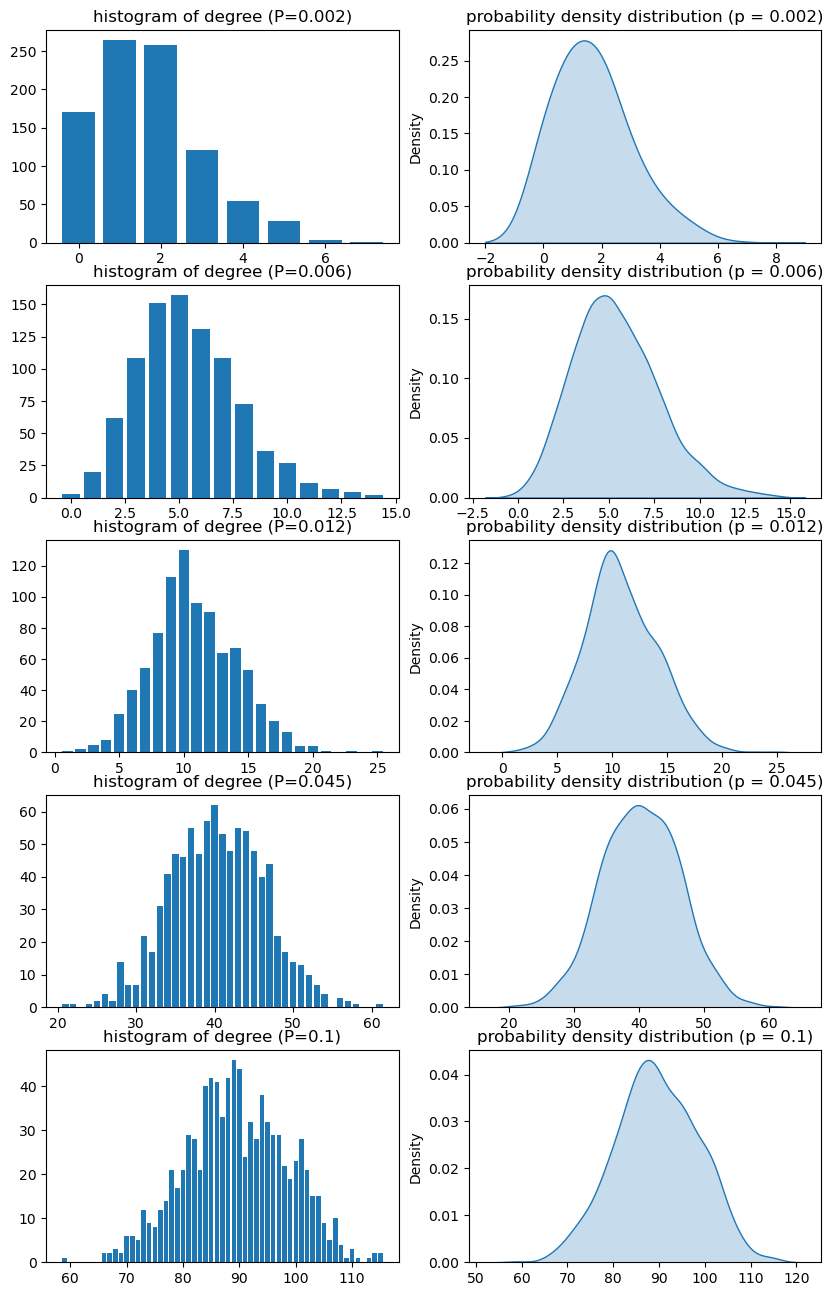

In [5]:
import seaborn as sns
fig,ax = plt.subplots(5,2,figsize = (10,16))
degrees = g1.degree()
plt.sca(ax[0,0])
plt.title('histogram of degree (P=0.002)')
degree_hist = plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', rwidth=0.8, density=False)
plt.sca(ax[0,1])
plt.title('probability density distribution (p = 0.002)')
sns.kdeplot(degrees,shade=True,bw_adjust=2)

plt.sca(ax[1,0])
plt.title('histogram of degree (P=0.006)')
degrees = g2.degree()
degree_hist = plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', rwidth=0.8, density=False)
plt.sca(ax[1,1])
plt.title('probability density distribution (p = 0.006)')
sns.kdeplot(degrees, shade=True)

plt.sca(ax[2,0])
plt.title('histogram of degree (P=0.012)')
degrees = g3.degree()
degree_hist = plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', rwidth=0.8, density=False)
plt.sca(ax[2,1])
plt.title('probability density distribution (p = 0.012)')
sns.kdeplot(degrees, shade=True)

plt.sca(ax[3,0])
plt.title('histogram of degree (P=0.045)')
degrees = g4.degree()
degree_hist = plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', rwidth=0.8, density=False)
plt.sca(ax[3,1])
plt.title('probability density distribution (p = 0.045)')
sns.kdeplot(degrees, shade=True)

plt.sca(ax[4,0])
plt.title('histogram of degree (P=0.1)')
degrees = g5.degree()
degree_hist = plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align='left', rwidth=0.8, density=False)
plt.sca(ax[4,1])
plt.title('probability density distribution (p = 0.1)')
sns.kdeplot(degrees, shade=True)

In [6]:
# Is_connected
print(g1.is_connected(),
g2.is_connected(),
g3.is_connected(),
g4.is_connected(),
g5.is_connected())

False False True True True


In [7]:
# The prob of being connected
Count1 = 0
for i in range(1000):
    g1 = ig.Graph.Erdos_Renyi(900, 0.002)
    Count1 += g1.is_connected()

print("Number of connected graphs:", Count1)

Count2 = 0
for i in range(1000):
    g2 = ig.Graph.Erdos_Renyi(900, 0.006)
    Count2 += g2.is_connected()

print("Number of connected graphs:", Count2)

Count3 = 0
for i in range(1000):
    g3 = ig.Graph.Erdos_Renyi(900, 0.012)
    Count3 += g3.is_connected()

print("Number of connected graphs:", Count3)

Count4 = 0
for i in range(1000):
    g4 = ig.Graph.Erdos_Renyi(900, 0.045)
    Count4 += g4.is_connected()

print("Number of connected graphs:", Count4)

Count5 = 0
for i in range(1000):
    g5 = ig.Graph.Erdos_Renyi(900, 0.1)
    Count5 += g5.is_connected()

print("Number of connected graphs:", Count5)

Number of connected graphs: 0
Number of connected graphs: 16
Number of connected graphs: 982
Number of connected graphs: 1000
Number of connected graphs: 1000


In [8]:
# get the components of the graph
component = g1.components()
# get the GCC of the graph
gcc1 = component.giant()
# get the diameter
print(gcc1.summary(),gcc1.diameter())

component = g2.components()
gcc2 = component.giant()
print(gcc2.summary(),gcc2.diameter())
component = g3.components()
gcc3 = component.giant()
print(gcc3.summary(),gcc3.diameter())
component = g4.components()
gcc4 = component.giant()
print(gcc4.summary(),gcc4.diameter())
component = g5.components()
gcc5 = component.giant()
print(gcc5.summary(),gcc5.diameter())

IGRAPH U--- 632 703 --  24
IGRAPH U--- 896 2365 --  8
IGRAPH U--- 900 4740 --  6
IGRAPH U--- 900 17988 --  3
IGRAPH U--- 900 40453 --  3


In [39]:
# Get the GCC size of networks witg p from range 0 to 0.015
a = 51
count = np.zeros((a,100))
P = np.zeros((a,100))
for i in range(a):
    p = i/5000
    for j in range(100):
        g1 = ig.Graph.Erdos_Renyi(900, p)
        component = g1.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        count[i,j] = gcc_size
        P[i,j] = p

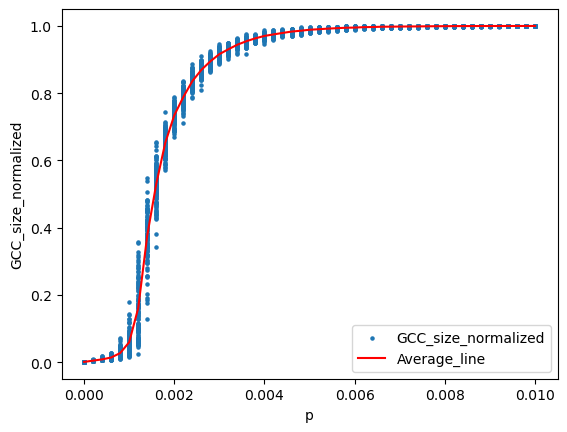

In [51]:
# Plot the normalized GCC size
count_normalized = count/900
plt.scatter(P,count_normalized,s=5,label = 'GCC_size_normalized')
count_average = np.mean(count_normalized, axis=1) # Plot the average line, P = P[0,:]
plt.plot(P[:,0],count_average,color = 'r',label = 'Average_line')
plt.legend()


# add labels and title
plt.xlabel('p')
plt.ylabel('GCC_size_normalized')
# display the plot
plt.show()


In [85]:
# sweep n in range 100 to 10000 (c = np = 0.5)
c = 0.5
GCC = np.zeros(990)
N = np.zeros(990)
for i in range(990):
    n = 10*i + 100
    p = c/n
    box = np.zeros(10)
    for j in range (10):
        g = ig.Graph.Erdos_Renyi(n, p)
        component = g.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        box[j] = gcc_size
    gcc_size_ave = np.mean(box)
    GCC[i] = gcc_size_ave
    N[i] = n

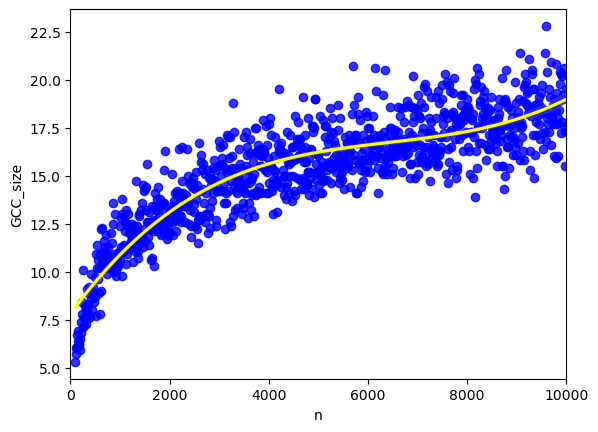

In [90]:
plt.xlim(0,10000)
sns.regplot(x=N, y=GCC, order=3,line_kws={'color':'yellow'}, scatter_kws={'color':'blue'})
plt.xlabel('n')
plt.ylabel('GCC_size')
plt.show()

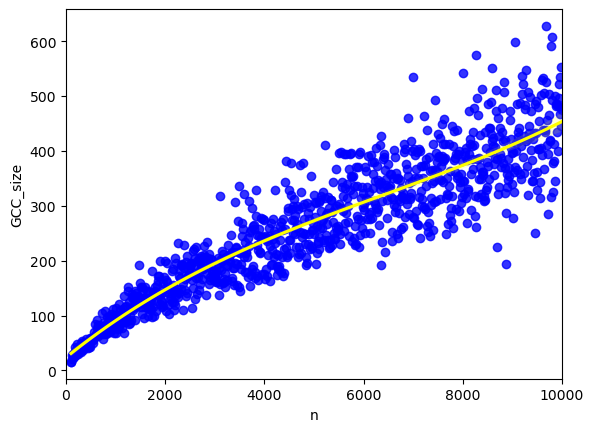

In [91]:
# sweep n in range 100 to 10000 (c = np = 1)
c = 1
GCC = np.zeros(990)
N = np.zeros(990)
for i in range(990):
    n = 10*i + 100
    p = c/n
    box = np.zeros(10)
    for j in range (10):
        g = ig.Graph.Erdos_Renyi(n, p)
        component = g.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        box[j] = gcc_size
    gcc_size_ave = np.mean(box)
    GCC[i] = gcc_size_ave
    N[i] = n
plt.xlim(0,10000)
sns.regplot(x=N, y=GCC, order=3,line_kws={'color':'yellow'}, scatter_kws={'color':'blue'})
plt.xlabel('n')
plt.ylabel('GCC_size')
plt.show()

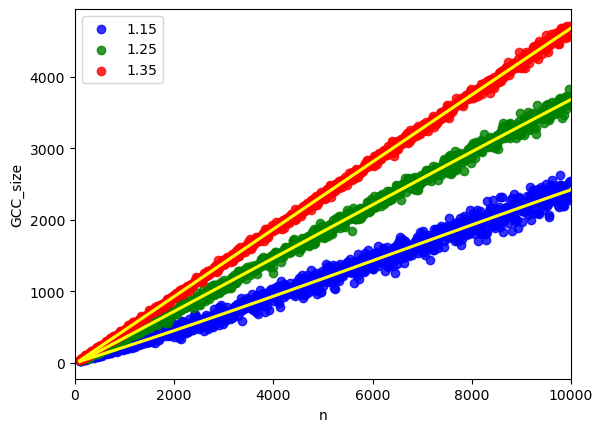

In [94]:
# c = 1.15, 1.25, 1.35
c = 1.15
GCC = np.zeros(990)
N = np.zeros(990)
for i in range(990):
    n = 10*i + 100
    p = c/n
    box = np.zeros(10)
    for j in range (10):
        g = ig.Graph.Erdos_Renyi(n, p)
        component = g.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        box[j] = gcc_size
    gcc_size_ave = np.mean(box)
    GCC[i] = gcc_size_ave
    N[i] = n
plt.xlim(0,10000)
sns.regplot(x=N, y=GCC, order=3,line_kws={'color':'yellow'}, scatter_kws={'color':'blue'},label = '1.15')

c = 1.25
GCC = np.zeros(990)
N = np.zeros(990)
for i in range(990):
    n = 10*i + 100
    p = c/n
    box = np.zeros(10)
    for j in range (10):
        g = ig.Graph.Erdos_Renyi(n, p)
        component = g.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        box[j] = gcc_size
    gcc_size_ave = np.mean(box)
    GCC[i] = gcc_size_ave
    N[i] = n
plt.xlim(0,10000)
sns.regplot(x=N, y=GCC, order=3,line_kws={'color':'yellow'}, scatter_kws={'color':'green'},label = '1.25')

c = 1.35
GCC = np.zeros(990)
N = np.zeros(990)
for i in range(990):
    n = 10*i + 100
    p = c/n
    box = np.zeros(10)
    for j in range (10):
        g = ig.Graph.Erdos_Renyi(n, p)
        component = g.components()
        gcc = component.giant()
        gcc_size = gcc.vcount()
        box[j] = gcc_size
    gcc_size_ave = np.mean(box)
    GCC[i] = gcc_size_ave
    N[i] = n
plt.xlim(0,10000)
sns.regplot(x=N, y=GCC, order=3,line_kws={'color':'yellow'}, scatter_kws={'color':'red'},label = '1.35')
plt.xlabel('n')
plt.ylabel('GCC_size')
plt.legend()
plt.show()